In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

In [3]:
exoplanet_df = pd.read_csv("exoplanet_data.csv")
exoplanet_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [5]:
exoplanet_df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,0.730631,1.945368,-0.337243,5.549368,0.320715,-0.320715,2.391190e+04,130.789186,-130.789186,121.194193,19.483454,-40.352509,1095.152768,8.263769e+03,3.599918e+03,-4.302621e+03,276.038764,1.233729,5700.682449,143.898155,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,3.346956,9.401850,1.349036,6.425205,0.665352,0.665352,8.241240e+04,4689.233030,4689.233030,3519.737626,436.752064,1366.939375,856.234809,1.775255e+05,5.607270e+04,9.924848e+04,824.788481,0.650089,802.060405,46.566511,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.167000,0.000000,-20.200000,7.500000e+00,0.000000,-388600.000000,0.140000,0.000000,-77180.000000,92.000000,2.000000e-02,0.000000e+00,-5.600031e+06,1.600000,1.000000,2661.000000,0.000000,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,0.198000,0.039900,-0.446000,2.446000,0.048900,-0.334000,1.604000e+02,9.400000,-48.000000,1.400000,0.240000,-2.080000,554.000000,2.227000e+01,1.139000e+01,-3.068950e+02,12.400000,1.000000,5297.000000,105.000000,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,0.539000,0.189800,-0.204000,3.793000,0.137000,-0.137000,4.245000e+02,20.200000,-20.200000,2.420000,0.520000,-0.310000,888.000000,1.466700e+02,8.090000e+01,-4.443000e+01,23.700000,1.000000,5757.000000,156.000000,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,0.891000,0.379000,-0.044000,6.197500,0.334000,-0.048900,1.533250e+03,48.000000,-9.400000,15.965000,2.650000,-0.140000,1397.500000,9.006700e+02,5.529550e+02,-6.400000e+00,82.250000,1.000000,6110.000000,174.000000,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,14667.000000,1.094755e+07,3.617133e+06,0.000000e+00,9054.700000,8.000000,15896.000000,676.000000,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


In [6]:
exoplanet_df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [7]:
exoplanet_df.groupby("koi_disposition").size()

koi_disposition
CANDIDATE         1687
CONFIRMED         1800
FALSE POSITIVE    3504
dtype: int64

In [8]:
labels = []

# LABEL ENCODE
for indx, row in exoplanet_df.iterrows():
    if row["koi_disposition"] ==  "CANDIDATE":
        labels.append(0)
    elif row["koi_disposition"] ==  "CONFIRMED":
        labels.append(1)
    else:
        labels.append(2)

exoplanet_df["koi_disposition_target"] = labels

In [13]:
exoplanet_df_sub = exoplanet_df.drop("koi_disposition", axis=1)

In [14]:
exoplanet_df_sub.corr()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_target
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,0.072748,-0.012333,-0.059048,0.287118,0.337558,-0.337558,-0.043942,0.031922,-0.031922,0.054410,0.061662,-0.051273,-0.003013,-0.000566,0.017538,-0.002140,-0.079241,0.035902,0.105008,0.129444,-0.149565,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643,0.380710
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,0.042021,0.130379,0.054633,0.014224,-0.181716,0.181716,0.423883,0.003900,-0.003900,-0.000752,0.004241,0.003393,0.191842,0.031315,0.030962,-0.023719,0.439764,-0.184721,0.104600,0.222332,-0.185036,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009,0.486481
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,0.007501,0.097642,0.002609,-0.048398,-0.004961,0.004961,-0.132939,-0.011108,0.011108,-0.013284,-0.015563,0.012901,0.259045,0.018086,0.016958,-0.011543,-0.134479,-0.122911,0.016750,0.159761,-0.121247,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023,0.452002
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,-0.004913,0.030568,0.011326,0.023232,0.025359,-0.025359,-0.088001,-0.003062,0.003062,-0.011078,-0.013318,0.009913,0.218624,0.034874,0.045647,-0.028259,-0.091905,-0.103976,0.012411,0.120078,-0.083607,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932,0.339983
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,0.067571,0.012136,-0.074607,0.324488,0.373670,-0.373670,-0.064272,0.038614,-0.038614,0.072790,0.052353,-0.070736,-0.390006,-0.021743,-0.029905,0.020268,-0.081456,-0.022590,0.021806,0.036838,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959,0.023592
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,0.028068,-0.004699,-0.039732,0.268469,0.529821,-0.529821,-0.069138,0.009823,-0.009823,0.030522,0.021726,-0.030554,-0.229438,-0.011772,-0.016157,0.010945,-0.082299,0.021398,0.032776,0.078357,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097,0.047197
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,-0.028068,0.004699,0.039732,-0.268469,-0.529821,0.529821,0.069138,-0.009823,0.009823,-0.030522,-0.021726,0.030554,0.229438,0.011772,0.016157,-0.010945,0.082299,-0.021398,-0.032776,-0.078357,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097,-0.047197
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,0.055597,0.044399,-0.065649,0.200979,0.228485,-0.228485,-0.037195,0.055597,-0.055597,0.039814,0.041496,-0.037977,-0.315510,-0.021307,-0.028232,0.020156,-0.058522,-0.006344,0.003641,0.039981,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898,-0.009463
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,0.023150,-0.015680,-0.035277,0.199305,0.519143,-0.519143,-0.110431,0.015094,-0.015094,0.014575,0.031086,-0.013119,-0.

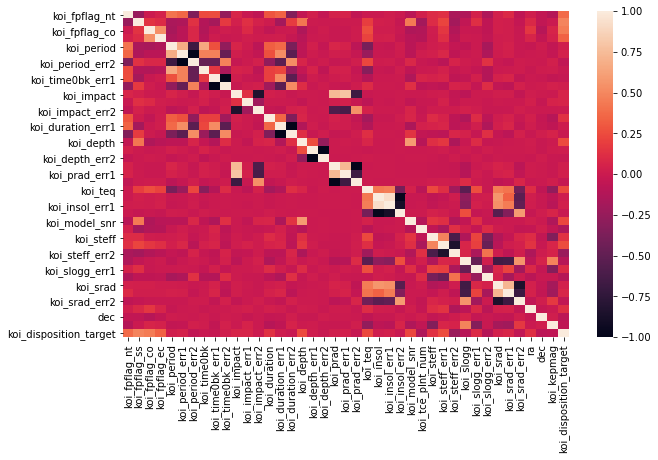

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(exoplanet_df_sub.corr())
plt.show()

In [18]:
exoplanet_df_sub.corr()["koi_disposition_target"]

koi_fpflag_nt             0.380710
koi_fpflag_ss             0.486481
koi_fpflag_co             0.452002
koi_fpflag_ec             0.339983
koi_period                0.023592
koi_period_err1           0.047197
koi_period_err2          -0.047197
koi_time0bk              -0.009463
koi_time0bk_err1         -0.029161
koi_time0bk_err2          0.029161
koi_impact                0.067744
koi_impact_err1           0.065843
koi_impact_err2           0.006219
koi_duration              0.134811
koi_duration_err1         0.015295
koi_duration_err2        -0.015295
koi_depth                 0.244109
koi_depth_err1            0.018775
koi_depth_err2           -0.018775
koi_prad                  0.029047
koi_prad_err1             0.035515
koi_prad_err2            -0.025778
koi_teq                   0.237782
koi_insol                 0.021096
koi_insol_err1            0.031934
koi_insol_err2           -0.015126
koi_model_snr             0.233840
koi_tce_plnt_num         -0.135711
koi_steff           

In [19]:
 # get pandas columns for prediction
target = exoplanet_df_sub["koi_disposition_target"]
features = exoplanet_df_sub.drop(["koi_disposition_target"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# train the model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.40      0.11      0.17      1360
           1       0.53      0.48      0.50      1407
           2       0.65      0.90      0.75      2825

    accuracy                           0.60      5592
   macro avg       0.53      0.50      0.48      5592
weighted avg       0.56      0.60      0.55      5592


Confusion Matrix - In Sample
[[ 147  367  846]
 [ 175  675  557]
 [  41  230 2554]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.27      0.08      0.12       327
           1       0.55      0.45      0.50       393
           2       0.60      0.88      0.72       679

    accuracy                           0.57      1399
   macro avg       0.48      0.47      0.44      1399
weighted avg       0.51      0.57      0.51      1399


Confusion Matrix - Out Sample
[[ 25  85 217]
 [ 42 178 173]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

# get evaluation report
print("Decision Tree Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Decision Tree Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1360
           1       1.00      1.00      1.00      1407
           2       1.00      1.00      1.00      2825

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592


Confusion Matrix - In Sample
[[1360    0    0]
 [   0 1407    0]
 [   0    0 2825]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       327
           1       0.74      0.74      0.74       393
           2       0.98      0.98      0.98       679

    accuracy                           0.85      1399
   macro avg       0.80      0.80      0.80      1399
weighted avg       0.84      0.85      0.85      1399


Confusion Matrix - Out Sample
[[227  94   6]
 [ 94 289 

In [22]:
 # train the model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1360
           1       1.00      1.00      1.00      1407
           2       1.00      1.00      1.00      2825

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592


Confusion Matrix - In Sample
[[1360    0    0]
 [   0 1407    0]
 [   0    0 2825]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       327
           1       0.84      0.83      0.84       393
           2       0.96      0.99      0.98       679

    accuracy                           0.89      1399
   macro avg       0.87      0.86      0.87      1399
weighted avg       0.89      0.89      0.89      1399


Confusion Matrix - Out Sample
[[248  61  18]
 [ 56 327 

In [23]:
# train the model
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

# get evaluation report
print("Ada Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Ada Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      1360
           1       0.65      0.85      0.73      1407
           2       0.99      0.93      0.96      2825

    accuracy                           0.84      5592
   macro avg       0.82      0.81      0.80      5592
weighted avg       0.86      0.84      0.84      5592


Confusion Matrix - In Sample
[[ 873  471   16]
 [ 197 1197   13]
 [   7  183 2635]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       327
           1       0.66      0.82      0.73       393
           2       0.98      0.92      0.95       679

    accuracy                           0.83      1399
   macro avg       0.80      0.79      0.79      1399
weighted avg       0.84      0.83      0.83      1399


Confusion Matrix - Out Sample
[[209 112   6]
 [ 65 324   4]

In [24]:
 # train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

# get evaluation report
print("GradientBoosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

GradientBoosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1360
           1       0.87      0.91      0.89      1407
           2       0.99      1.00      0.99      2825

    accuracy                           0.94      5592
   macro avg       0.92      0.92      0.92      5592
weighted avg       0.94      0.94      0.94      5592


Confusion Matrix - In Sample
[[1155  189   16]
 [ 104 1285   18]
 [   4    0 2821]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       327
           1       0.85      0.83      0.84       393
           2       0.98      1.00      0.99       679

    accuracy                           0.90      1399
   macro avg       0.88      0.88      0.88      1399
weighted avg       0.90      0.90      0.90      1399


Confusion Matrix - Out Sample
[[262  59   6]
 [ 59 3

In [25]:
 # train the model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:43:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1360
           1       1.00      1.00      1.00      1407
           2       1.00      1.00      1.00      2825

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592


Confusion Matrix - In Sample
[[1360    0    0]
 [   0 1407    0]
 [   0    0 2825]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       327
           1       0.86      0.84      0.85       

In [26]:
 # train the model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

#get predictions
in_sample_preds = knn.predict(X_train)
out_sample_preds = knn.predict(X_test)

# get evaluation report
print("KNN Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

KNN Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.53      0.45      0.48      1360
           1       0.65      0.70      0.67      1407
           2       0.79      0.82      0.81      2825

    accuracy                           0.70      5592
   macro avg       0.66      0.66      0.65      5592
weighted avg       0.69      0.70      0.69      5592


Confusion Matrix - In Sample
[[ 606  342  412]
 [ 229  985  193]
 [ 305  198 2322]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.42      0.38      0.40       327
           1       0.60      0.61      0.60       393
           2       0.74      0.77      0.76       679

    accuracy                           0.63      1399
   macro avg       0.59      0.59      0.59      1399
weighted avg       0.63      0.63      0.63      1399


Confusion Matrix - Out Sample
[[124  99 104]
 [ 77 240  76]
 [ 93